In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


from nltk.probability import FreqDist
from nltk import word_tokenize

import string
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
import requests 
import html5lib
from bs4 import BeautifulSoup
import googletrans
from googletrans import Translator
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [12]:
translator = Translator()
lemmatizer = WordNetLemmatizer()


def preprocess(filename):
    f = open(filename,'r')
    text = f.read()
    text = text.lower()

    text = str(translator.translate(text, dest = 'en', src = 'nl'))

    text_p = "".join([char for char in text if char not in string.punctuation])

    words = word_tokenize(text_p)
    
    stop_words = stopwords.words('english')
    filtered_words = [word for word in words if word not in stop_words]
    
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in filtered_words]
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    pos = pos_tag(filtered_words)
    
    return words, filtered_words, stemmed, lemmatized, pos
    

In [13]:
words, filtered_words, stemmed, lemmatized, pos = preprocess('/Users/dj/Documents/GitHub/inbraak_6.txt')

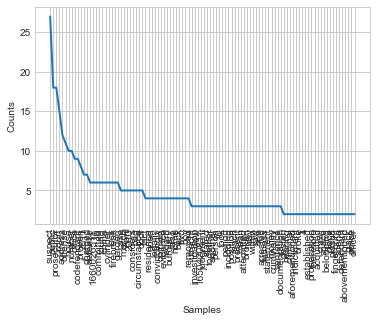

<class 'method'>
suspect;27
public;18
prosecutor;18
court;15
address;12
offense;11
house;10
number;10
office;9
codefendant;9
proven;8
2011;7
charged;7
defense;6
1660026511;6
16;6
committed;6
found;6
crime;6
cylinder;6


In [14]:
#print('Words:', words[:50])

#print('Filtered words:', filtered_words[:50])

#print('Stemmed words:', stemmed[:50])

# print('Part of Speech:', pos[:50]) Test

freq = FreqDist(lemmatized)

freq.plot(100)




# freq.items()
test = freq.max
print(type(test))

for word, frequency in freq.most_common(20):
    print(u'{};{}'.format(word, frequency))



In [ ]:

### Specific Words

"""
# Let's take the specific words only if their frequency is greater than 3.
specific_words = dict([(m, n) for m, n in freq.items() if len(m) > 10])
 
for key in sorted(specific_words):
    print("%s: %s" % (key, specific_words[key]))
 
data_analysis = FreqDist(specific_words)
 
data_analysis.plot(25, cumulative=False)
"""
